In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import os
import glob
import sys
import numpy as np
import pandas as pd
from PIL import Image

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import sample_colorscale

import ipywidgets as widgets
from IPython.display import display, clear_output
from pathlib import Path

In [2]:
df = pd.read_parquet("../sourcedata/df_metrics.parquet")
df.sort_values(by=['scene_full_name', 'subject', 'learning_phase'], inplace=True)
df['subject'] = np.where(
    df['subject'].str.startswith('im_'),
    'im-' + df['subject'].str.split('_').str[1],
    df['subject'],
)
df

,subject,learning_phase,scene_full_name,delta_clr_tot,delta_spd_tot,delta_MAD_tot,count,cleared,speed,MAD_mean,level_full_name,scene
3267,im-sub-01,sub-01_epoch=0-step=2000,1-1-0,-0.909091,-59.380211,NaN,44.0,1.000000,65.546218,NaN,w1l1,0
3847,im-sub-01,sub-01_epoch=0-step=3500,1-1-0,-0.909091,-59.380211,NaN,44.0,1.000000,67.774272,NaN,w1l1,0
3557,im-sub-01,sub-01_epoch=0-step=500,1-1-0,-0.909091,-59.380211,NaN,44.0,1.000000,65.546218,NaN,w1l1,0
4137,im-sub-01,sub-01_epoch=0-step=5000,1-1-0,-0.909091,-59.380211,NaN,44.0,1.000000,69.729730,NaN,w1l1,0
2977,im-sub-01,sub-01_epoch=0-step=6500,1-1-0,-0.909091,-59.380211,NaN,44.0,0.090909,6.166008,NaN,w1l1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11715,sub-05,Late practice,8-3-9,-1.000000,-108.170498,-0.261936,NaN,NaN,NaN,NaN,w8l3,9
12295,sub-06,Early discovery,8-3-9,0.133333,10.194895,-8.961299,6.0,0.666667,69.068186,10.583333,w8l3,9
12585,sub-06,Early practice,8-3-9,0.133333,10.194895,-8.961299,6.0,0.833333,75.940503,3.608475,w8l3,9
12005,sub-06,Late discovery,8-3-9,0.133333,10.194895,-8.961299,6.0,0.833333,75.943115,5.003390,w8l3,9


In [3]:
df_human = df[df['subject'].str.startswith('sub-')].copy()
df_human['phase'] = df_human['learning_phase'].apply(lambda x: x.split(' ')[1])
df_human['count_phase'] = df_human.groupby(['phase', 'scene_full_name', 'subject'])['count'].transform('sum')

df_pivot = df_human.pivot_table(
    index=['subject', 'scene_full_name'],
    columns='phase',
    values='count_phase'
).reset_index()

fig = px.scatter(
    df_pivot,
    x='discovery',
    y='practice',
    hover_name='scene_full_name',
    color='subject',
    labels={
        "discovery": "N attempts in Discovery Phase",
        "practice": "N attempts in Practice Phase"
    },
    title="Comparison of the number of attempts between the practice and discovery phases"
)


# Mise à jour axes
fig.update_xaxes( dtick=5)  # tu peux ajuster dtick
fig.update_yaxes( dtick=5)

# Taille carrée de la figure (optionnel)
fig.update_layout(width=700, height=612)
fig.show()

In [4]:

scene_preselected = []

df_human.groupby(['subject', 'scene_full_name']).apply(
    lambda x: scene_preselected.append([x.subject.unique()
                                        , x.scene_full_name.unique()]) if (x.count_phase >= 10).all() & (x.count_phase <= 25).all()
    else None
)

rows = []
print(scene_preselected)
for sub_arr, scene_arr in scene_preselected:
    rows.append({
        "subject": sub_arr[0],
        "scene_full_name": scene_arr[0]
    })

df_prefilter_hum = pd.DataFrame(rows)
#print(df_prefilter_hum['subject'].value_counts())
#df_prefilter_hum
pd.DataFrame(df_prefilter_hum['scene_full_name'].value_counts()).sort_values(by='scene_full_name')


[[array(['sub-01'], dtype=object), array(['3-2-7'], dtype=object)], [array(['sub-01'], dtype=object), array(['5-1-5'], dtype=object)], [array(['sub-01'], dtype=object), array(['5-1-6'], dtype=object)], [array(['sub-01'], dtype=object), array(['5-2-6'], dtype=object)], [array(['sub-01'], dtype=object), array(['8-2-15'], dtype=object)], [array(['sub-01'], dtype=object), array(['8-3-8'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-1-6'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-1-7'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-1-8'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-1-9'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-3-4'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-3-5'], dtype=object)], [array(['sub-02'], dtype=object), array(['1-3-6'], dtype=object)], [array(['sub-02'], dtype=object), array(['2-3-6'], dtype=object)], [array(['sub-02'], dtype=object), array(['2-3-7'], dtype=obj

/tmp/ipykernel_186997/1104623654.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,count
scene_full_name,
1-1-6,1
1-1-7,1
1-1-8,1
1-1-9,1
1-3-0,1
...,...
8-2-9,1
8-3-4,1
8-3-7,1


In [5]:
df_prefilter_imi = df_prefilter_hum.copy()
df_prefilter_imi['subject'] = 'im-'+df_prefilter_imi['subject']

df_prefilter_ppo = df_prefilter_hum.copy()
df_prefilter_ppo['subject'] = 'ppo'

df_prefilter = pd.concat([df_prefilter_hum, df_prefilter_imi, df_prefilter_ppo], ignore_index=True)

df_prefilter['combine'] = df_prefilter['subject'] + '_' + df_prefilter['scene_full_name']
df['combine'] = df['subject'] + '_' + df['scene_full_name']

filter = (df['combine'].isin(df_prefilter['combine']))
df_filtered = df[filter]
df_filtered.sort_values('subject')

,subject,learning_phase,scene_full_name,delta_clr_tot,delta_spd_tot,delta_MAD_tot,count,cleared,speed,MAD_mean,level_full_name,scene,combine
3907,im-sub-01,sub-01_epoch=0-step=3500,3-2-7,0.000000,-1.448499,NaN,36.0,0.944444,130.954109,NaN,w3l2,7,im-sub-01_3-2-7
3926,im-sub-01,sub-01_epoch=0-step=3500,8-3-8,0.333333,36.935264,NaN,39.0,0.717949,113.178620,NaN,w8l3,8,im-sub-01_8-3-8
3636,im-sub-01,sub-01_epoch=0-step=500,8-3-8,0.333333,36.935264,NaN,39.0,0.358974,70.723107,NaN,w8l3,8,im-sub-01_8-3-8
4216,im-sub-01,sub-01_epoch=0-step=5000,8-3-8,0.333333,36.935264,NaN,39.0,0.615385,99.934299,NaN,w8l3,8,im-sub-01_8-3-8
3056,im-sub-01,sub-01_epoch=0-step=6500,8-3-8,0.333333,36.935264,NaN,39.0,0.692308,107.658371,NaN,w8l3,8,im-sub-01_8-3-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,sub-06,Early discovery,5-2-0,0.046154,-3.522409,0.694751,10.0,0.800000,46.182635,2.516304,w5l2,0,sub-06_5-2-0
12565,sub-06,Early practice,5-2-0,0.046154,-3.522409,0.694751,12.0,1.000000,38.124521,4.475000,w5l2,0,sub-06_5-2-0
11985,sub-06,Late discovery,5-2-0,0.046154,-3.522409,0.694751,10.0,0.800000,46.182635,2.516304,w5l2,0,sub-06_5-2-0
12912,sub-06,Late practice,4-3-0,0.000000,10.118154,0.401364,11.0,1.000000,52.683056,1.515000,w4l3,0,sub-06_4-3-0


In [6]:
# -------------------------- #
# ---------- DATA ---------- #
# -------------------------- #

df = df_filtered.copy()

df_long = df.copy().drop_duplicates('delta_spd_tot')

df_long = df_long.rename(columns={
    'delta_clr_tot': 'delta_clr',
    'delta_spd_tot': 'delta_spd'
})

# 2. Pivot pour chaque métrique
df_clr = df_long.pivot(index='scene_full_name', columns='subject', values='delta_clr')
df_spd = df_long.pivot(index='scene_full_name', columns='subject', values='delta_spd')

# 3. Renommer les colonnes pour inclure le nom du sujet
df_clr.columns = [f"{sub}_delta_clr" for sub in df_clr.columns]
df_spd.columns = [f"{sub}_delta_spd" for sub in df_spd.columns]

# 4. Fusionner les deux métriques
df = pd.concat([df_clr, df_spd], axis=1)

# ----------------------------- #
# ---------- HELPERS ---------- #
# ----------------------------- #

def get_subset(df, sub):
       cols = df.columns
       valid_cols = [col for col in cols if (sub in col) or ('ppo' in col)]
       return df[valid_cols].copy()


# ----------------------------- #
# ------------ MAIN ----------- #
# ----------------------------- #

def make_dashboard(df, sub):

    df_sub = get_subset(df, sub)

    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"type": "xy"}, {"type": "xy"}],
               [{"type": "xy"}, {"type": "xy"}]],
        column_widths=[0.5, 0.5],
        row_heights=[0.45, 0.45],
        vertical_spacing=0.15,
        horizontal_spacing=0.1,
    )

#subplot_titles=(f"Clearance delta for: {sub}, im_{sub}",
#                        f"Clearance delta for: {sub}, and ppo",
#                        f"Spead delta for: {sub}, im_{sub} ", 
#                        f"Spead delta for: {sub}, and ppo ")

    fig.update_layout( height=7000)

    fig.add_trace(
            go.Scatter(
                x=df_sub[f"{sub}_delta_clr"],
                y=df_sub[f"im-{sub}_delta_clr"],
                mode='markers',
                name=f"Delta Total Clearance for {sub}",
                showlegend=False,
                customdata=df_sub.index,
                hovertemplate="Scene: %{customdata}<br> x: %{x} <br> y: %{y}<extra></extra>",
                marker=dict(
                    size=10,
                    color=list(range(len(df_sub[f"{sub}_delta_clr"]))),  # une couleur unique par index
                    colorscale='Viridis',       # palette de couleurs de ton choix
                    showscale=True              # optionnel : afficher la barre de couleur
                )
            ),
            row=1, col=1
        )
    fig.update_xaxes(title_text="Humans' deltas for clearance", row=1, col=1, range=[-1.1, 1.1])
    fig.update_yaxes(title_text="Imitations' deltas for clearance", row=1, col=1, range=[-1.1, 1.1])

    fig.add_trace(
            go.Scatter(
                x=df_sub[f"{sub}_delta_clr"],
                y=df_sub[f"ppo_delta_clr"],
                mode='markers',
                name=f"Delta Total Clearance for {sub}",
                showlegend=False,
                customdata=df_sub.index,
                hovertemplate="Scene: %{customdata}<br> x: %{x} <br> y: %{y}<extra></extra>",
                marker=dict(
                    size=10,
                    color=list(range(len(df_sub[f"{sub}_delta_clr"]))),  # une couleur unique par index
                    colorscale='Viridis',       # palette de couleurs de ton choix
                    showscale=True              # optionnel : afficher la barre de couleur
                )
            ),
            row=2, col=1
        )
    fig.update_xaxes(title_text="Humans' deltas for clearance", row=2, col=1, range=[-1.1, 1.1])
    fig.update_yaxes(title_text="PPO's deltas for clearance", row=2, col=1, range=[-1.1, 1.1])

    fig.add_trace(
            go.Scatter(
                x=df_sub[f"{sub}_delta_spd"],
                y=df_sub[f"im-{sub}_delta_spd"],
                mode='markers',
                name=f"Delta Total Clearance for {sub}",
                showlegend=False,
                customdata=df_sub.index,
                hovertemplate="Scene: %{customdata}<br> x: %{x} <br> y: %{y}<extra></extra>",
                marker=dict(
                    size=10,
                    color=list(range(len(df_sub[f"{sub}_delta_spd"]))),  # une couleur unique par index
                    colorscale='Viridis',       # palette de couleurs de ton choix
                    showscale=True              # optionnel : afficher la barre de couleur
                )
            ),
            row=1, col=2
        )
    fig.update_xaxes(title_text="Humans' deltas for speed", row=1, col=2)
    fig.update_yaxes(title_text="Imitations' deltas for speed", row=1, col=2)

    fig.add_trace(
            go.Scatter(
                x=df_sub[f"{sub}_delta_spd"],
                y=df_sub['ppo_delta_clr'],
                mode='markers',
                name=f"Delta Total Clearance for {sub}",
                showlegend=False,
                customdata=df_sub.index,
                hovertemplate="Scene: %{customdata}<br> x: %{x} <br> y: %{y}<extra></extra>",
                marker=dict(
                    size=10,
                    color=list(range(len(df_sub[f"{sub}_delta_spd"]))),  # une couleur unique par index
                    colorscale='Viridis',       # palette de couleurs de ton choix
                    showscale=True              # optionnel : afficher la barre de couleur
                )
            ),
            row=2, col=2
        )
    fig.update_xaxes(title_text="Humans' deltas for speed", row=2, col=2)
    fig.update_yaxes(title_text="PPO's deltas for speed", row=2, col=2)


    # Global layout tuned for clean initial render
    fig.update_layout(
        height=540,
        autosize=True,
        margin=dict(l=20, r=20, t=70, b=70),
        title_text=f"Subject: {sub}",
        legend=dict(orientation="h", y=-0.22, x=0.0),
        uniformtext_minsize=10, uniformtext_mode='hide',
        bargap=0.3,
    )

    fig.update_layout(
        scene=dict(
            xaxis_title=f"{sub} delta clearance",
            yaxis_title=f"im-{sub} delta clearance",
            zaxis_title="ppo delta clearance",
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1]),
        )
    )

    # Axes for Speed subplot (right)
    fig.update_layout(
        scene2=dict(
            xaxis_title=f"{sub} delta speed",
            yaxis_title=f"im-{sub} delta speed",
            zaxis_title="ppo delta speed",
        )
    )

    fig.update_layout(showlegend=False)
    fig.update_traces(marker=dict(size=5))  

    # Shrink subplot titles, nudge slightly
    for ann in fig.layout.annotations:
        ann.font.size = 12
        ann.yshift = 6

    return fig

# ---------- WIDGETS ----------
subs = ['sub-01', 'sub-02', 'sub-03', 'sub-05', 'sub-06']
sub_dd = widgets.Dropdown(
    options=subs, value=subs[0],
    description="Subject:", layout=widgets.Layout(width="240px")
)

out = widgets.Output(layout=widgets.Layout(border="0px"))

# ---------- CALLBACKS ----------
def on_sub_change(change):
    draw()


def draw():
    with out:
        clear_output(wait=True)
        if (sub_dd.value is None):
            print("No data available for the current selection.")
            return
        fig = make_dashboard(df, sub_dd.value)
        # Use .show with minimal toolbar & no selection tools
        fig.show(config={"displaylogo": False, "modeBarButtonsToRemove": ["select", "lasso2d"]})

# Wire up observers
sub_dd.observe(on_sub_change, names="value")

# ---------- DISPLAY FIRST, THEN DRAW (prevents initial overlap) ----------
controls = widgets.HBox([sub_dd])
display(controls, out)
draw()  # clean initial render



Output(layout=Layout(border_bottom='0px', border_left='0px', border_right='0px', border_top='0px'))

In [84]:
def compute_disctance(df, x, y, target):
    df['distance'] = np.sqrt((df[x] - target[0])**2 + (df[y] - target[1])**2)
    print(df.nsmallest(5, 'distance')[['distance', x, y]])
    return df

In [132]:
compute_disctance(df, "sub-05_delta_clr", 'ppo_delta_clr', (1, -1))

                 distance  sub-05_delta_clr  ppo_delta_clr
scene_full_name                                           
8-3-4            1.022764          0.445455      -0.140625
7-1-4            1.118962          0.375000      -0.071856
8-2-13           1.123910          0.547619       0.028846
8-2-12           1.218008          0.455556       0.089552
4-1-0            1.414214          0.000000       0.000000


,im-sub-01_delta_clr,im-sub-02_delta_clr,im-sub-03_delta_clr,im-sub-05_delta_clr,im-sub-06_delta_clr,ppo_delta_clr,sub-01_delta_clr,sub-02_delta_clr,sub-03_delta_clr,sub-05_delta_clr,...,im-sub-03_delta_spd,im-sub-05_delta_spd,im-sub-06_delta_spd,ppo_delta_spd,sub-01_delta_spd,sub-02_delta_spd,sub-03_delta_spd,sub-05_delta_spd,sub-06_delta_spd,distance
scene_full_name,,,,,,,,,,,,,,,,,,,,,
1-1-6,NaN,0.282051,NaN,NaN,NaN,0.012903,NaN,0.125000,NaN,NaN,...,NaN,NaN,NaN,25.251489,NaN,-6.786661,NaN,NaN,NaN,NaN
1-1-7,NaN,0.111111,NaN,NaN,NaN,-0.067568,NaN,0.285714,NaN,NaN,...,NaN,NaN,NaN,-1.607214,NaN,-20.050701,NaN,NaN,NaN,NaN
1-1-8,NaN,0.030303,NaN,NaN,NaN,0.173913,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,24.491391,NaN,-44.964217,NaN,NaN,NaN,NaN
1-1-9,NaN,0.343750,NaN,NaN,NaN,-0.218045,NaN,0.200000,NaN,NaN,...,NaN,NaN,NaN,-7.938899,NaN,-18.039531,NaN,NaN,NaN,NaN
1-3-0,NaN,NaN,NaN,NaN,-0.914286,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,-44.280119,15.509355,NaN,NaN,NaN,NaN,-0.192293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8-2-9,NaN,-0.137931,NaN,NaN,NaN,-0.033333,NaN,0.155556,NaN,NaN,...,NaN,NaN,NaN,-1.328211,NaN,-7.733413,NaN,NaN,NaN,NaN
8-3-4,NaN,NaN,NaN,0.1,NaN,-0.140625,NaN,NaN,NaN,0.445455,...,NaN,-7.121869,NaN,-9.170088,NaN,NaN,NaN,21.632545,NaN,1.022764
8-3-7,NaN,NaN,NaN,NaN,-0.166667,0.034965,NaN,NaN,NaN,NaN,...,NaN,NaN,-19.359015,8.427389,NaN,NaN,NaN,NaN,20.914937,NaN


In [133]:
compute_disctance(df, "sub-05_delta_clr", 'im-sub-05_delta_clr', (1, -1))

                 distance  sub-05_delta_clr  im-sub-05_delta_clr
scene_full_name                                                 
4-1-0            1.006897          0.000000            -0.882353
8-2-13           1.030528          0.547619            -0.074074
8-2-12           1.138604          0.455556             0.000000
7-1-4            1.157584          0.375000            -0.025641
8-3-4            1.231877          0.445455             0.100000


,im-sub-01_delta_clr,im-sub-02_delta_clr,im-sub-03_delta_clr,im-sub-05_delta_clr,im-sub-06_delta_clr,ppo_delta_clr,sub-01_delta_clr,sub-02_delta_clr,sub-03_delta_clr,sub-05_delta_clr,...,im-sub-03_delta_spd,im-sub-05_delta_spd,im-sub-06_delta_spd,ppo_delta_spd,sub-01_delta_spd,sub-02_delta_spd,sub-03_delta_spd,sub-05_delta_spd,sub-06_delta_spd,distance
scene_full_name,,,,,,,,,,,,,,,,,,,,,
1-1-6,NaN,0.282051,NaN,NaN,NaN,0.012903,NaN,0.125000,NaN,NaN,...,NaN,NaN,NaN,25.251489,NaN,-6.786661,NaN,NaN,NaN,NaN
1-1-7,NaN,0.111111,NaN,NaN,NaN,-0.067568,NaN,0.285714,NaN,NaN,...,NaN,NaN,NaN,-1.607214,NaN,-20.050701,NaN,NaN,NaN,NaN
1-1-8,NaN,0.030303,NaN,NaN,NaN,0.173913,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,24.491391,NaN,-44.964217,NaN,NaN,NaN,NaN
1-1-9,NaN,0.343750,NaN,NaN,NaN,-0.218045,NaN,0.200000,NaN,NaN,...,NaN,NaN,NaN,-7.938899,NaN,-18.039531,NaN,NaN,NaN,NaN
1-3-0,NaN,NaN,NaN,NaN,-0.914286,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,-44.280119,15.509355,NaN,NaN,NaN,NaN,-0.192293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8-2-9,NaN,-0.137931,NaN,NaN,NaN,-0.033333,NaN,0.155556,NaN,NaN,...,NaN,NaN,NaN,-1.328211,NaN,-7.733413,NaN,NaN,NaN,NaN
8-3-4,NaN,NaN,NaN,0.1,NaN,-0.140625,NaN,NaN,NaN,0.445455,...,NaN,-7.121869,NaN,-9.170088,NaN,NaN,NaN,21.632545,NaN,1.231877
8-3-7,NaN,NaN,NaN,NaN,-0.166667,0.034965,NaN,NaN,NaN,NaN,...,NaN,NaN,-19.359015,8.427389,NaN,NaN,NaN,NaN,20.914937,NaN


In [109]:
df_human = df[df['subject'].str.startswith('sub-')].copy()
df_human['phase'] = df_human['learning_phase'].apply(lambda x: x.split(' ')[1])
df_human['count_phase'] = df_human.groupby(['phase', 'scene_full_name', 'subject'])['count'].transform('sum')
mask_drope = df_human['count_phase'] < 10
scene_to_drope = df_human.loc[mask_drope, 'scene_full_name'].unique()
mask_drope = df['scene_full_name'].isin(scene_to_drope)
df = df[~mask_drope].copy()
print(df['scene_full_name'].nunique())
print(df['scene_full_name'].unique())
df

40
['2-3-0' '2-3-1' '2-3-2' '3-2-0' '3-2-1' '3-2-2' '3-2-3' '4-3-0' '4-3-1'
 '4-3-2' '5-2-0' '5-2-1' '5-2-2' '6-1-0' '6-1-1' '6-1-2' '6-3-0' '6-3-1'
 '6-3-2' '6-3-3' '7-1-0' '7-1-1' '7-3-0' '7-3-1' '7-3-2' '7-3-3' '7-3-4'
 '7-3-5' '8-2-0' '8-2-1' '8-2-2' '8-2-3' '8-2-4' '8-2-5' '8-2-6' '8-2-7'
 '8-3-0' '8-3-1' '8-3-2' '8-3-3']


,subject,learning_phase,scene_full_name,delta_clr_tot,delta_spd_tot,delta_MAD_tot,count,cleared,speed,MAD_mean,level_full_name,scene
3364,im_sub-01,sub-01_epoch=0-step=2000,2-3-0,0.000000,0.000000,NaN,58.0,0.017241,1.516458,NaN,w2l3,0
3944,im_sub-01,sub-01_epoch=0-step=3500,2-3-0,0.000000,0.000000,NaN,58.0,0.017241,1.516458,NaN,w2l3,0
3654,im_sub-01,sub-01_epoch=0-step=500,2-3-0,0.000000,0.000000,NaN,58.0,0.017241,1.516458,NaN,w2l3,0
4234,im_sub-01,sub-01_epoch=0-step=5000,2-3-0,0.000000,0.000000,NaN,58.0,1.000000,67.660386,NaN,w2l3,0
3074,im_sub-01,sub-01_epoch=0-step=6500,2-3-0,0.000000,0.000000,NaN,58.0,0.017241,1.516458,NaN,w2l3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11744,sub-05,Late practice,8-3-3,-0.065217,-34.268135,-0.136364,23.0,0.434783,45.401466,32.069091,w8l3,3
12324,sub-06,Early discovery,8-3-3,-0.037037,18.574075,9.112727,27.0,0.592593,61.047781,8.265455,w8l3,3
12614,sub-06,Early practice,8-3-3,-0.037037,18.574075,9.112727,26.0,0.576923,80.552702,19.150909,w8l3,3
12034,sub-06,Late discovery,8-3-3,-0.037037,18.574075,9.112727,24.0,0.750000,105.517079,17.774545,w8l3,3


In [ ]:
df.where(df['count_phase']<10)

In [38]:
def get_sub_type(row):
    if row['subject'] == 'ppo':
        return 'ppo'
    elif row['subject'].startswith('im'):
        return 'imi'
    else:
        return 'hum'

df['sub_type'] = df.apply(get_sub_type, axis=1)

df_sub_type = (
    df
    .groupby(['scene_full_name', 'sub_type'])[
        ['delta_clr_tot', 'delta_spd_tot', 'MAD_mean']
    ]
    .mean()
    .reset_index()
)
df_sub_type.head(20)

,scene_full_name,sub_type,delta_clr_tot,delta_spd_tot,MAD_mean
0,2-3-0,hum,0.016304,5.239464,3.238839
1,2-3-0,imi,0.034054,7.387870,NaN
2,2-3-0,ppo,0.000000,11.340051,0.787968
3,2-3-1,hum,0.028571,10.732344,0.577731
4,2-3-1,imi,-0.014404,0.601661,NaN
5,2-3-1,ppo,0.021583,21.424895,8.434056
6,2-3-2,hum,0.134012,21.666948,3.190002
7,2-3-2,imi,-0.001231,0.464718,NaN
8,2-3-2,ppo,0.302920,50.932550,11.550614
9,3-2-0,hum,-0.002149,1.750571,3.512676


In [77]:
import plotly.express as px

px.histogram(data_frame=df_sub_type, x='delta_clr_tot', color='sub_type', barmode='overlay', histnorm='', nbins=40, marginal='box')

In [79]:
px.histogram(data_frame=df_sub_type, x='delta_spd_tot' , color='sub_type', barmode='overlay', histnorm='', nbins=40, marginal='box')

In [73]:
px.histogram(data_frame=df_sub_type, x='MAD_mean', color='sub_type', barmode='overlay', histnorm='', nbins=40, marginal='box')

<Axes: xlabel='delta_spd_tot', ylabel='delta_clr_tot'>

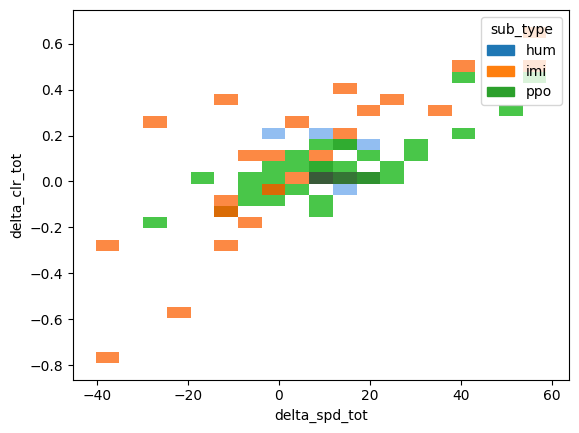

In [65]:
sns.histplot(data=df_sub_type, x='delta_spd_tot',y = 'delta_clr_tot' , hue='sub_type', element='step', stat='density', common_norm=False)

In [9]:
thres_clr = 15
thres_spd = 15
thres_MAD = 15
thres = 15

In [53]:
metrics = ["delta_clr_tot", "delta_spd_tot"]
thres = 10 # top-n / bottom-n

dfs = []

for metric in metrics:
    # top
    top_df = (
        df_sub_type.groupby("sub_type", group_keys=False)
        .apply(lambda x: x.nlargest(thres, metric))
        .assign(selected_by=f"{metric}_top")
    )
    dfs.append(top_df)
    
    # bottom
    bottom_df = (
        df_sub_type.groupby("sub_type", group_keys=False)
        .apply(lambda x: x.nsmallest(thres, metric))
        .assign(selected_by=f"{metric}_bottom")
    )
    dfs.append(bottom_df)

df_select = pd.concat(dfs, ignore_index=True)

# Compter combien de sub_type par scène
scene_counts = df_select.groupby("scene_full_name")["sub_type"].nunique()

# Scènes apparaissant dans >1 sub_type
scenes_intersection = scene_counts[scene_counts > 1].index

df_intersection = df_select[df_select["scene_full_name"].isin(scenes_intersection)]
df_intersection

/tmp/ipykernel_47150/3330419760.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(thres, metric))
/tmp/ipykernel_47150/3330419760.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(thres, metric))
/tmp/ipykernel_47150/3330419760.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versi

,scene_full_name,sub_type,delta_clr_tot,delta_spd_tot,MAD_mean,selected_by
0,4-3-2,hum,0.375992,23.825542,19.106132,delta_clr_tot_top
1,5-2-2,hum,0.228217,0.751434,21.538980,delta_clr_tot_top
2,6-3-3,hum,0.224595,12.647228,19.494784,delta_clr_tot_top
3,8-2-7,hum,0.222849,8.828348,12.120296,delta_clr_tot_top
4,4-3-1,hum,0.178597,8.611019,4.899925,delta_clr_tot_top
...,...,...,...,...,...,...
112,8-2-5,ppo,-0.039583,-6.183213,24.483095,delta_spd_tot_bottom
113,8-2-7,ppo,-0.093834,-5.639533,30.936104,delta_spd_tot_bottom
116,4-3-2,ppo,-0.003676,0.539549,17.300309,delta_spd_tot_bottom
117,5-2-1,ppo,0.064407,0.895189,7.800251,delta_spd_tot_bottom


In [54]:
df_pivot = (
    df_intersection
    .groupby(["scene_full_name", "selected_by"])["sub_type"]
    .unique()  # retourne un array de sub_type unique
    .apply(list)  # si tu veux convertir en liste
    .unstack(fill_value=[])
)

df_pivot

selected_by,delta_clr_tot_bottom,delta_clr_tot_top,delta_spd_tot_bottom,delta_spd_tot_top
scene_full_name,,,,
2-3-1,[imi],[],[],[ppo]
2-3-2,[],"[hum, ppo]",[],"[hum, ppo]"
3-2-0,"[hum, imi]",[],"[hum, imi]",[]
3-2-1,[hum],[ppo],[hum],"[imi, ppo]"
3-2-2,[hum],[ppo],[hum],"[imi, ppo]"
3-2-3,[],"[hum, imi]",[],"[hum, imi]"
4-3-0,"[hum, imi]",[],"[hum, imi]",[]
4-3-1,[],"[hum, imi]",[imi],[]
4-3-2,[ppo],[hum],[ppo],[hum]


In [55]:
print(f"Nombre de scènes sélectionnées: {df_select['scene_full_name'].nunique()}")

Nombre de scènes sélectionnées: 39


list of scene:

- 2-3-1
- 3-2-3
- 4-3-1
- 5-2-0 - sub-06 and ppo
- 5-2-1
- 5-2-2 - imi hum et ppo im-01 et ppo
- 6-3-3	hum arrive a apprendre et pas les agents
- 7-3-2	les agents apprennent beaucoup
- 7-3-4 les agents apprennent beaucoup et sont meilleur que les humains, ppo est une machine
- 8-2-3 tout le monde y arrive bien, pas d'apprentissage fulgurant
- 8-2-6	im-01
- 8-2-7 les hum apprennent beaucoup
- 8-3-0 top ppo  bottom im
- 8-3-1 im très forts


